Посмотрим на переменные, которые содержит датасет:

1. <b>school</b> — аббревиатура школы, в которой учится ученик (нет пропусков)
2. <b>sex</b> — пол ученика ('F' - ж, 'M' - м) (нет пропусков)
3. <b>age</b> — возраст ученика [15...22]
4. <b>address</b> — тип адреса ученика ('U' - городской, 'R' - за городом)
5. <b>famsize</b> — размер семьи('LE3' <= 3, 'GT3' >3)
6. <b>Pstatus</b> — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. <b>Medu</b> — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - ср.специальное или 11 классов, 4 - высшее)
8. <b>Fedu</b> — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - ср.специальное или 11 классов, 4 - высшее)
9. <b>Mjob</b> — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. <b>Fjob</b> — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. <b>reason</b> — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - обр.программа, 'other' - другое)
12. <b>guardian</b> — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. <b>traveltime</b> — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. <b>studytime</b> — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. <b>failures</b> — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. <b>schoolsup</b> — дополнительная образовательная поддержка (yes/no)
17. <b>famsup</b> — семейная образовательная поддержка (yes/no)
18. <b>paid</b> — дополнительные платные занятия по математике (yes/no)
19. <b>activities</b> — дополнительные внеучебные занятия (yes/no)
20. <b>nursery</b> — посещал детский сад (yes/no)
21. <b>higher</b> — хочет получить высшее образование (yes/no)
22. <b>internet</b> — наличие интернета дома (yes/no)
23. <b>romantic</b> — в романтических отношениях (yes/no)
24. <b>famrel</b> — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. <b>freetime</b> — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. <b>goout</b> — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. <b>health</b> — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. <b>absences</b> — количество пропущенных занятий
29. <b>score</b> — баллы по госэкзамену по математике

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

students = pd.read_csv('stud_math.csv')

In [37]:
# Фильтр выбросов с графиком
def get_ejec(column, ran_st, ran_sp):
    median = students[column].median()
    IQR = students[column].quantile(0.75) - students[column].quantile(0.25)
    perc25 = students[column].quantile(0.25)
    perc75 = students[column].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
          "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                                                          l=perc75 + 1.5*IQR))
    students[column].loc[students[column].between(perc25 - 1.5*IQR,
                                                  perc75 + 1.5*IQR)].hist(bins=16,
                                                                          range=(
                                                                              ran_st, ran_sp),
                                                                          label='IQR')
    students[column].loc[students[column] <= 100].hist(alpha=0.5, bins=16, range=(ran_st, ran_sp),
                                                       label='Выброс')
    plt.legend()

In [38]:
# функция для построениях боксплотов относительно (ось Y) оценки
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [39]:
# функция теста Стьюдента
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [40]:
# сменим название колонки для удобства
students.rename(columns={'studytime, granular': 'granular'}, inplace=True)

display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

<b>В датасете 13 числовых столбцов и 17 строковых<br/>
Все пустые возможные значения уже заполнены как Nan,
дополнительно их обрабатывать не надо.<br/>
В колонке Fedu есть значение "40", хотя у нас данные могут быть заполнены только от 0 до 4<br/>
В колонке famrel есть значение "-1", хотя у нас данные могут быть заполнены только от 1 до 5<br/>
В колонке absences (пропущенные занятие) есть данные сильно завышенные<br/>
Есть студенты с нулевой оценкой за экзамен</b>

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

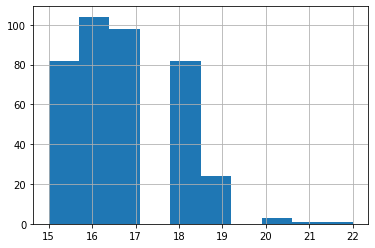

In [41]:
# Возраст - единственный числовой столбец без пропусков. Посмотрим на его распределение
students.age.hist()
students.age.describe()

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


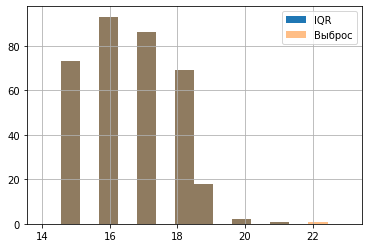

In [31]:
# формула для проверки выбросов, надо указать поле и границы
get_ejec('age', 14, 23)

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

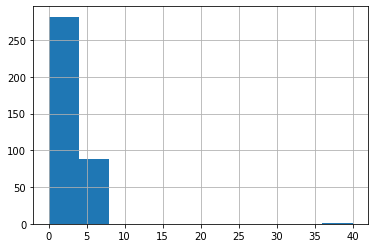

In [45]:
students.Fedu.hist()
students.Fedu.describe()

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


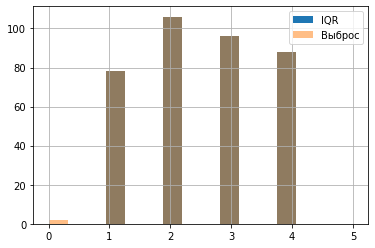

In [46]:
get_ejec('Fedu', 0, 5)

<b>Видно, что по формуле те, кто не имеют из отцов образования - является выбросом. Но такое имеет место быть. А вот значение выбивающееся из заданных границы [0..5] явно опечатка или ошибка.<br/><br/>Проверка данных, показывающих выбросы не дают нам их исключить, так как они могут действительно быть и не являться ошибкой (например возраст в 22 года)</b>

In [53]:
# исключаем опечатку из образований отцов
students = students.loc[students.Fedu != 40]

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

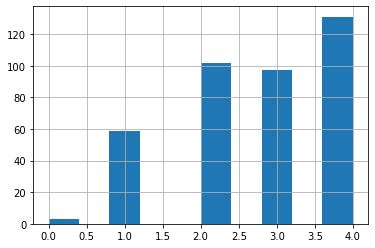

In [47]:
students.Medu.hist()
students.Medu.describe()

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

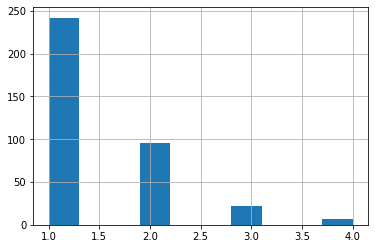

In [48]:
students.traveltime.hist()
students.traveltime.describe()

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

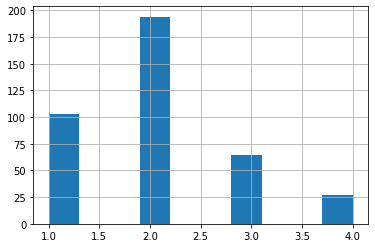

In [49]:
students.studytime.hist()
students.studytime.describe()

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

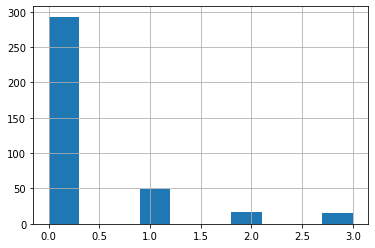

In [50]:
students.failures.hist()
students.failures.describe()

count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: granular, dtype: float64

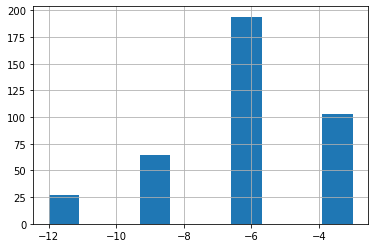

In [51]:
students.granular.hist()
students.granular.describe()

count    367.000000
mean       3.934605
std        0.926876
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

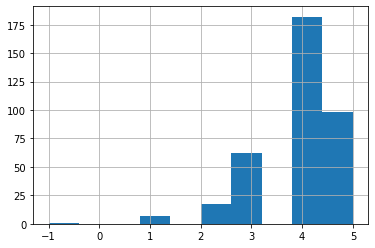

In [54]:
students.famrel.hist()
students.famrel.describe()

<b>Так же, похожая ситуация с семейными отношениями [1..5] - есть выбивающиеся значения. Исключим их из данных.</b>

In [10]:
# исключаем отрицательные отношения
students = students.loc[students.famrel != -1]

count    383.000000
mean       3.234987
std        0.993238
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

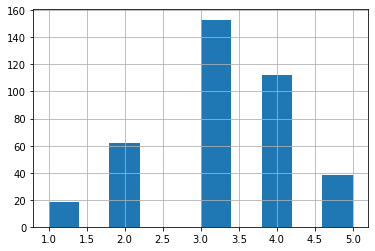

In [55]:
students.freetime.hist()
students.freetime.describe()

count    386.000000
mean       3.108808
std        1.115918
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

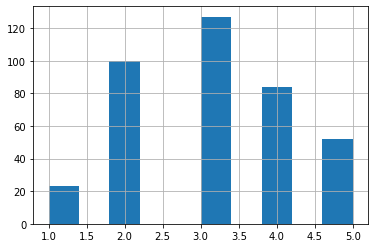

In [56]:
students.goout.hist()
students.goout.describe()

count    379.000000
mean       3.530343
std        1.397656
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

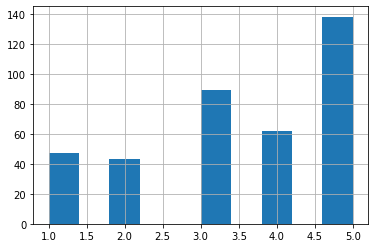

In [57]:
students.health.hist()
students.health.describe()

count    382.000000
mean       7.287958
std       23.495369
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

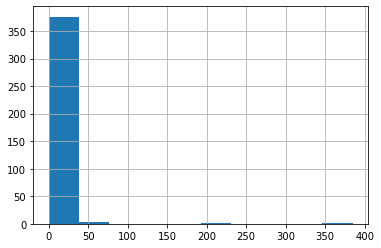

In [58]:
students.absences.hist()
students.absences.describe()
# количество пропущенных занятий больше 200 - явно что-то не в порядке

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


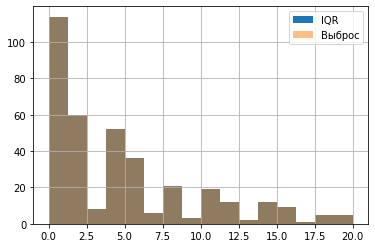

In [59]:
get_ejec('absences', 0, 20)

<b>В среднем в учебном году 200 учебных дней, при шестидневной неделе. Следовательно пропусков больше этого количества быть не может.Исключим из нашего датасета учеников, у которых пропусков больше, чем учебных дней.<br/><br/>Так как у нас очень разнятся данные по пропускам - можем их сгруппировать по категориям: 0 пропусков - 0, 1-25 - 1, 26-50 - 2, 51-75 - 3</b>

In [60]:
students = students.loc[students.absences < 200]


def absen_cat(absen):
    if absen == 0:
        return 0
    elif (absen > 0) & (absen < 26):
        return 1
    elif (absen > 25) & (absen < 51):
        return 2
    else:
        return 3


students['absen_group'] = students.absences.apply(absen_cat)
display(students.absen_group.value_counts())

1    261
0    111
2      5
3      3
Name: absen_group, dtype: int64

count    375.000000
mean      51.946667
std       22.823956
min        0.000000
25%       40.000000
50%       55.000000
75%       67.500000
max      100.000000
Name: score, dtype: float64

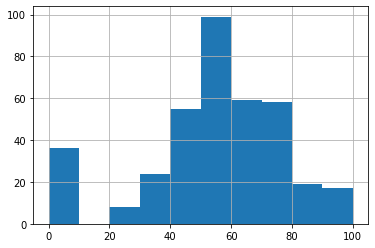

In [61]:
students.score.hist()
students.score.describe()

<b>Просмотрев колонки - можно убедиться, что пустые значения корректно введены и не учитываются при подсчете, выбросы по логике удалять пока не надо (не считая явных ошибок, которые удалены выше), нет данных, которые можно "схлопнуть" как в тестовом примере. Данные достаточно "чистые", имеют уникальные значения.</b><br/><br/>
<b>Выясним, какие столбцы коррелируют с оценками учеников.<br/>Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.<br/>
Корреляции рассмотрим только для числовых столбцов.</b>

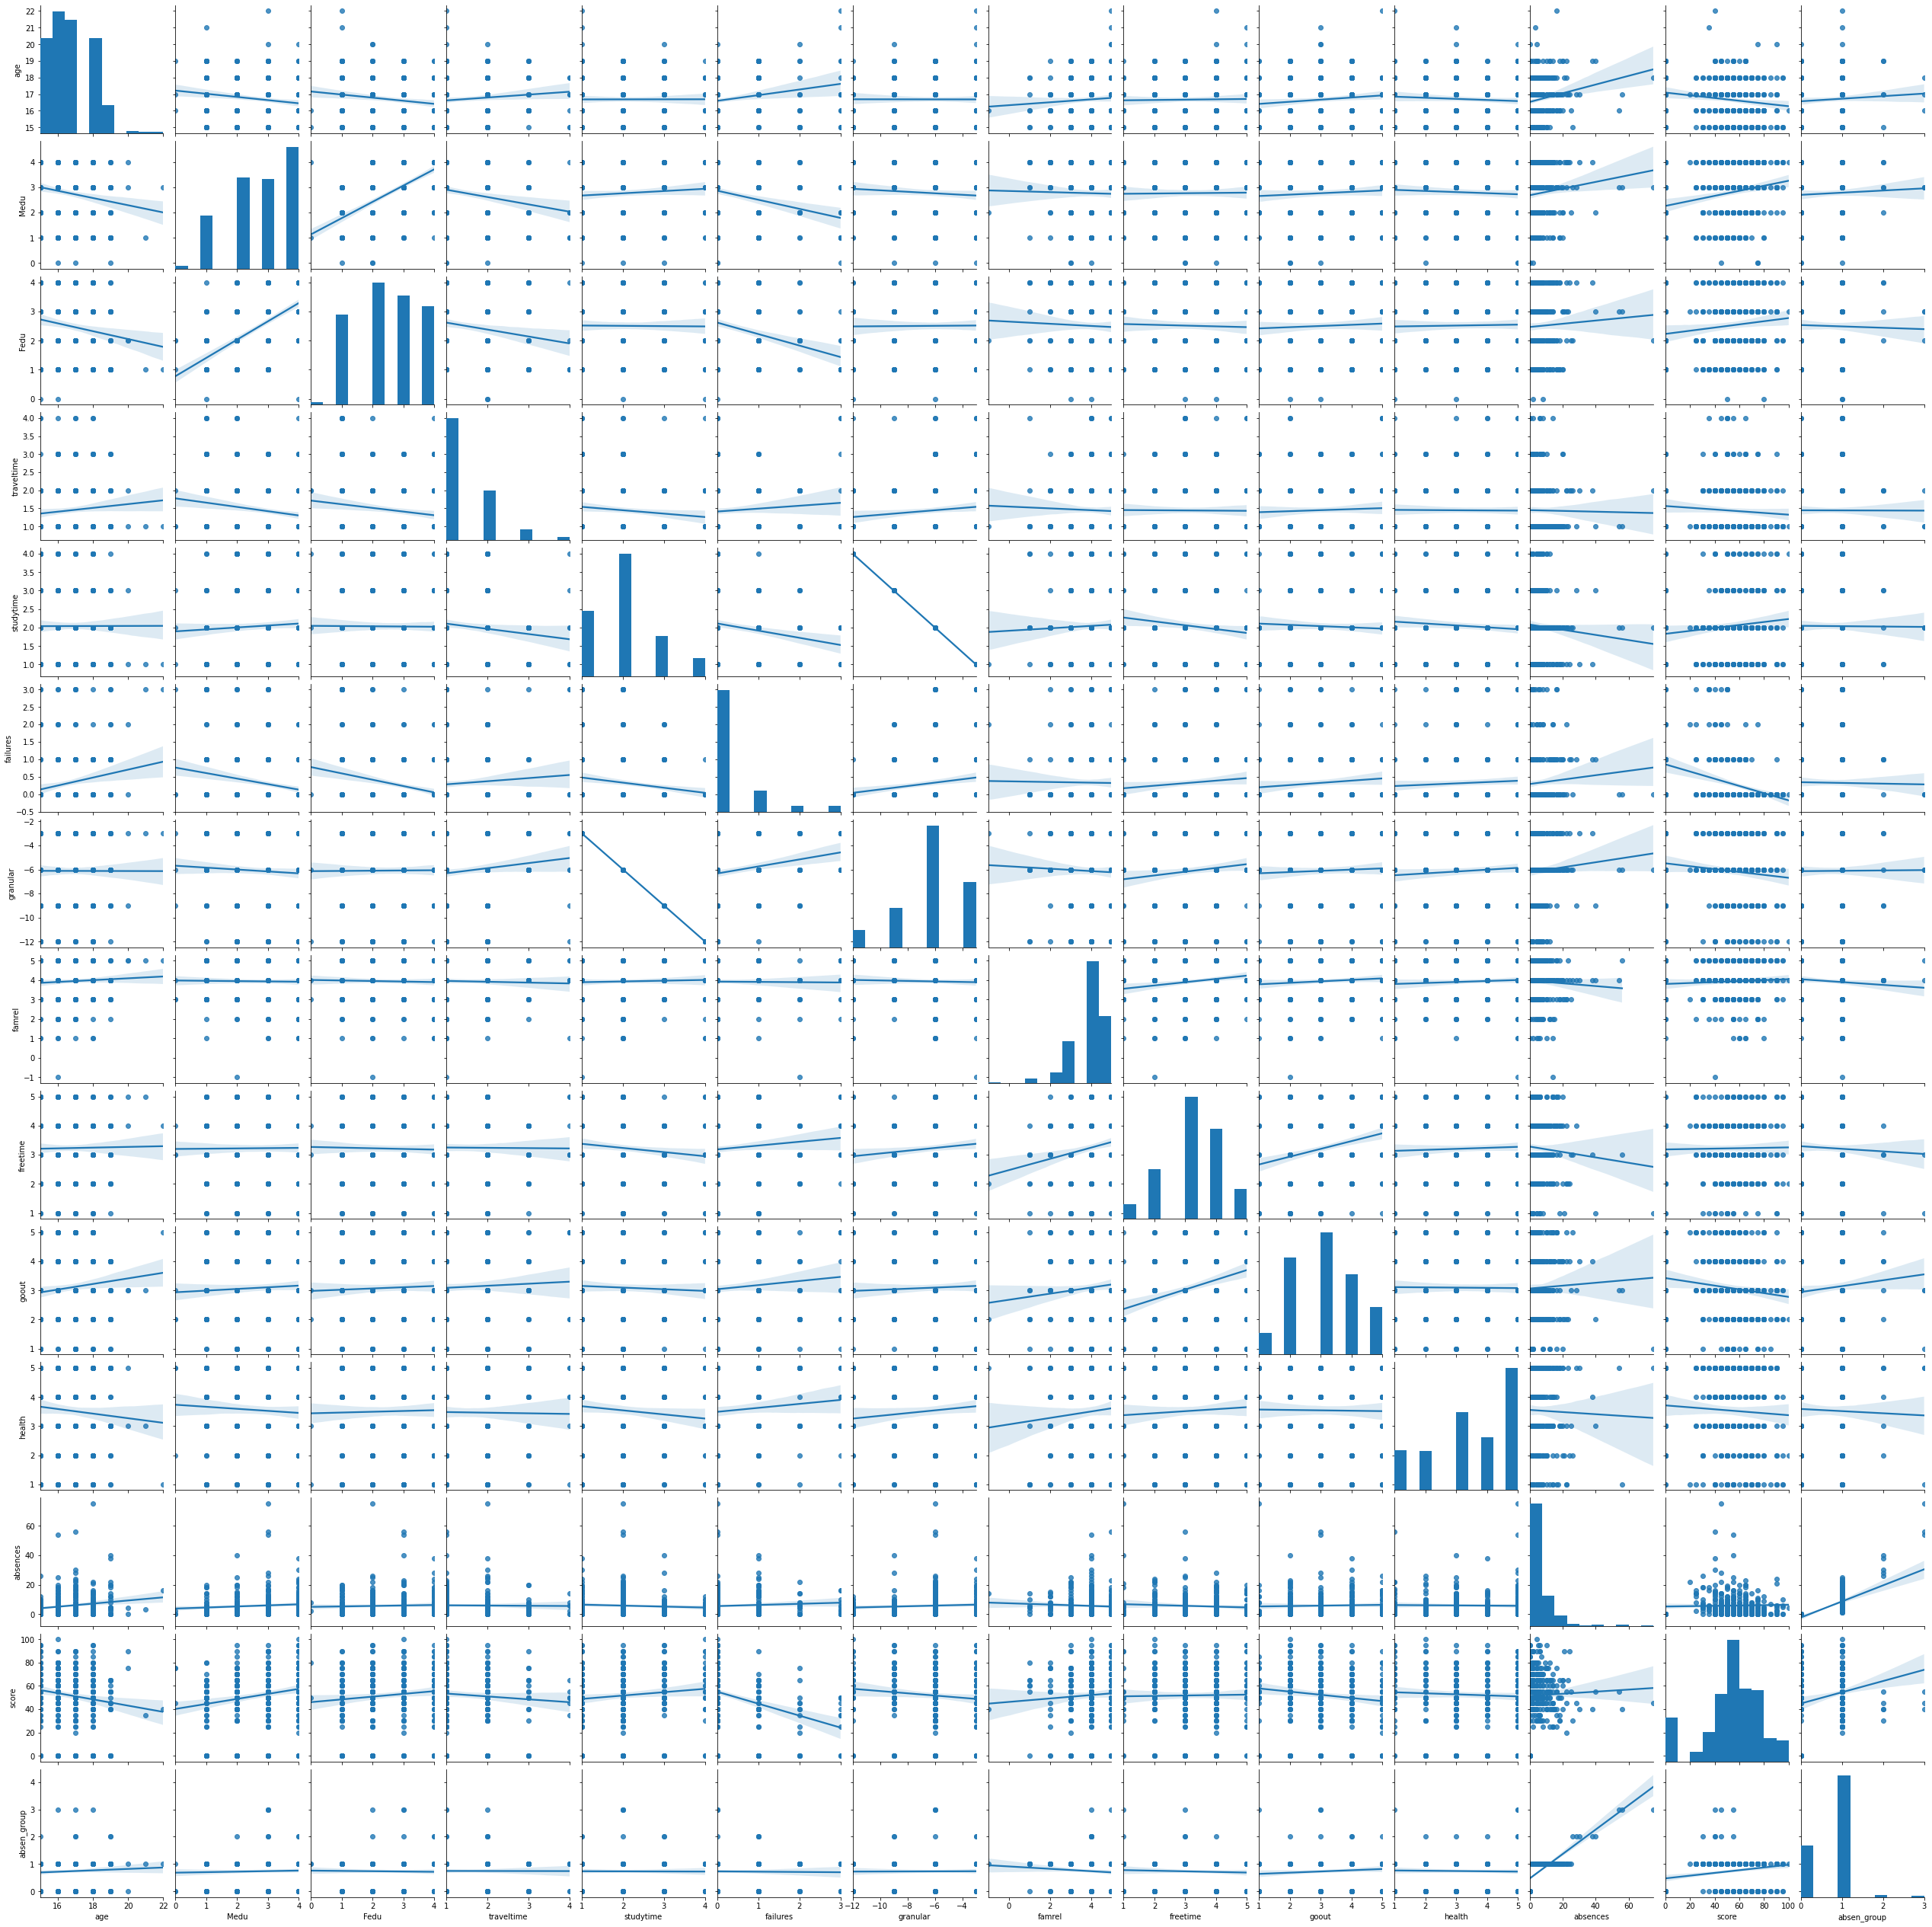

In [67]:
sns.pairplot(students, kind='reg')

In [69]:
correlation = students.corr()

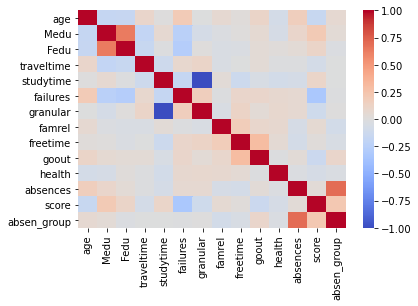

In [71]:
sns.heatmap(correlation, annot=False, cmap='coolwarm')

<b>Из таблицы выше видно, что у нас нет сильно коррелирующих данных. Кроме одной - granular и studytime имеют обратную(отрицательную) корреляцию. Чем больше ученик тратит времени на учебу, тем меньше значение granular.</b><br/><br/>
<b>Пять учеников не имеют оценки за математику, что не подходит под нашу задачу (влияние данных на оценку по экзамену). Можно ли их исключить?</b><br/><br/>
<b>Анализ номинативных переменных (всех, кроме granular)</b>

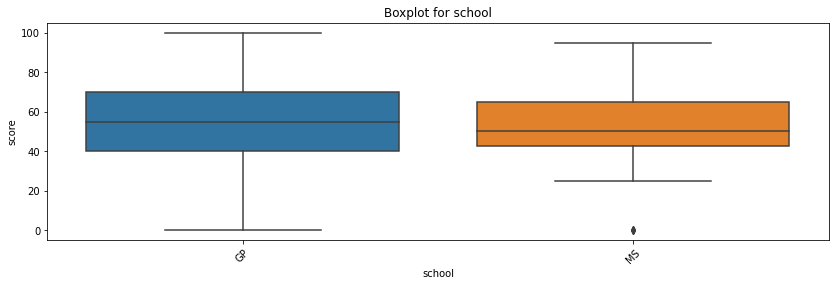

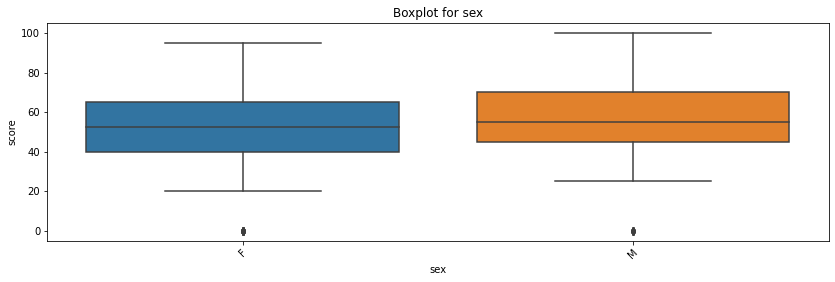

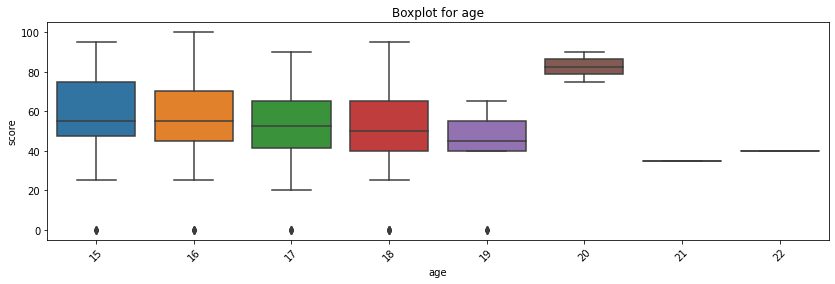

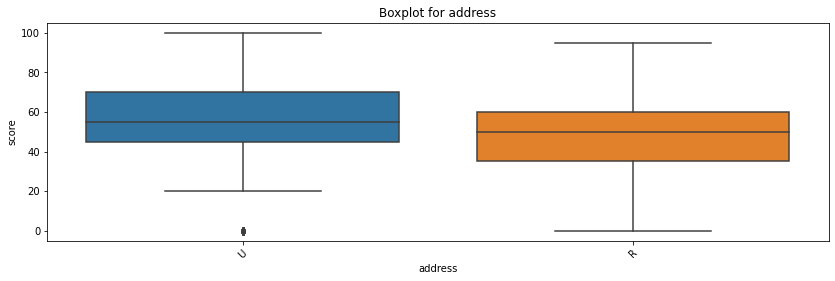

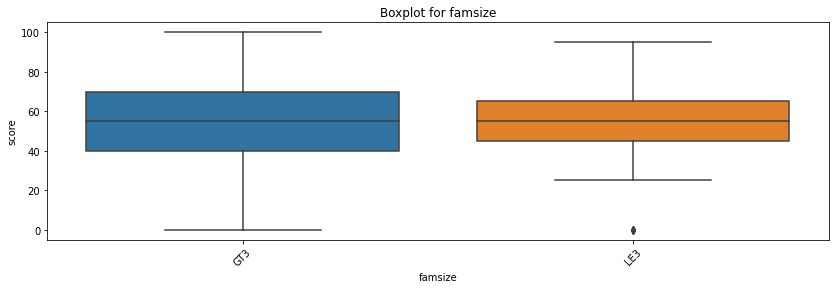

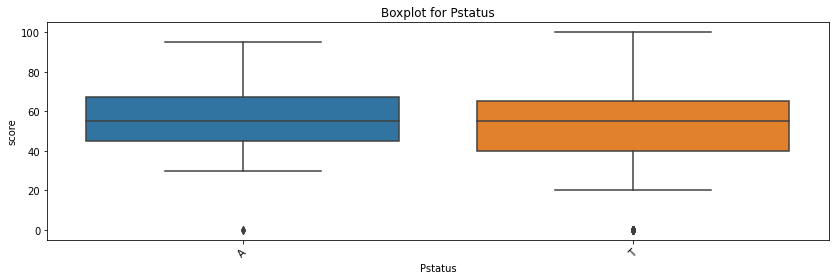

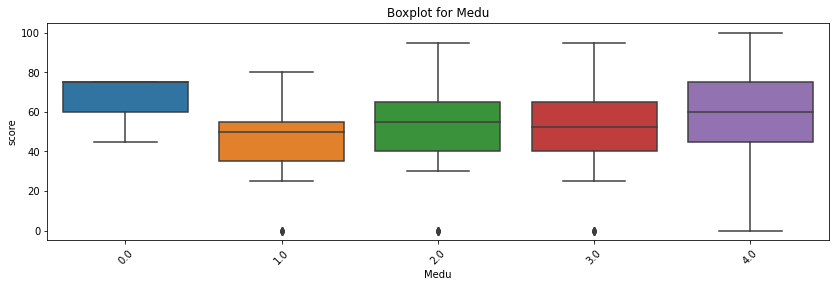

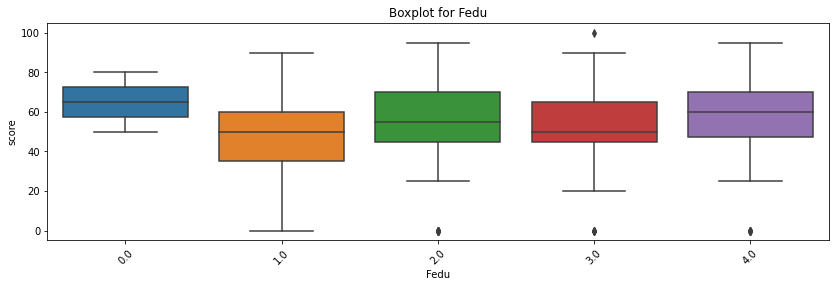

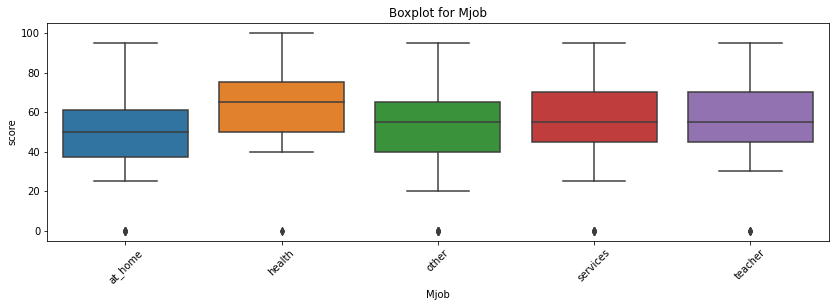

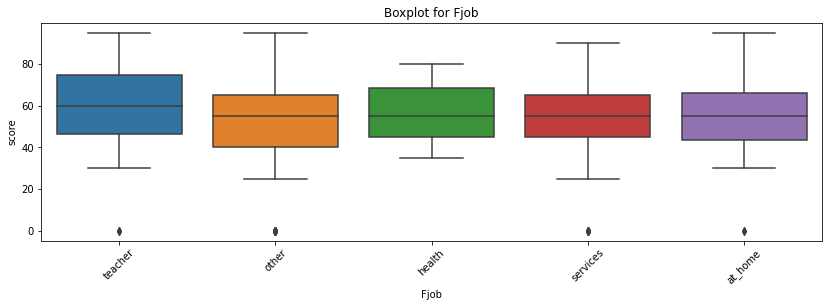

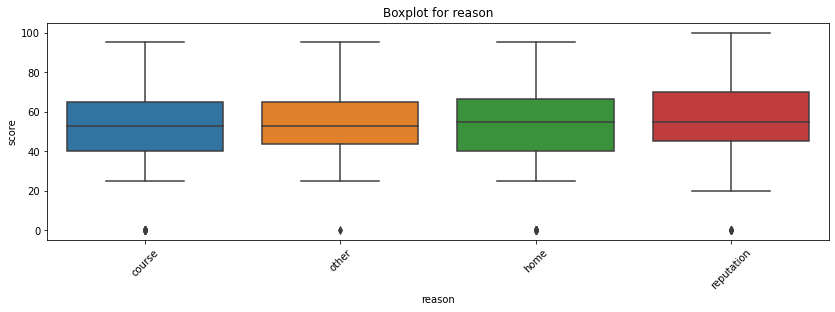

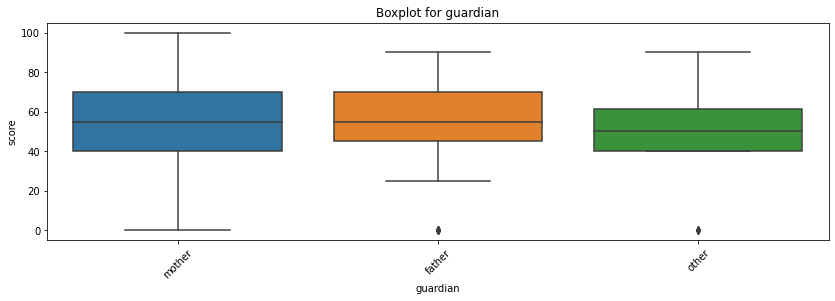

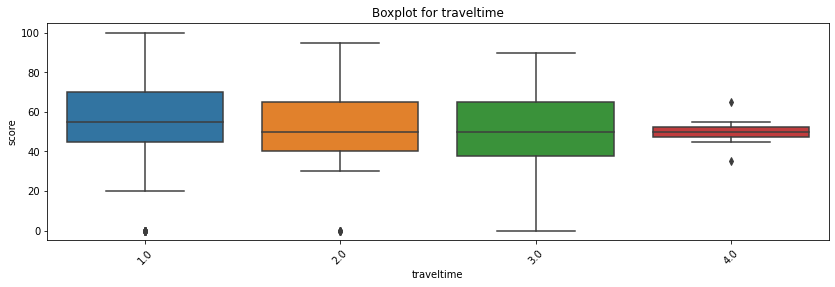

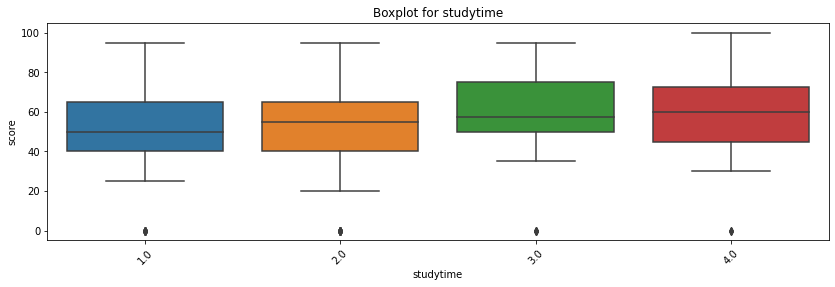

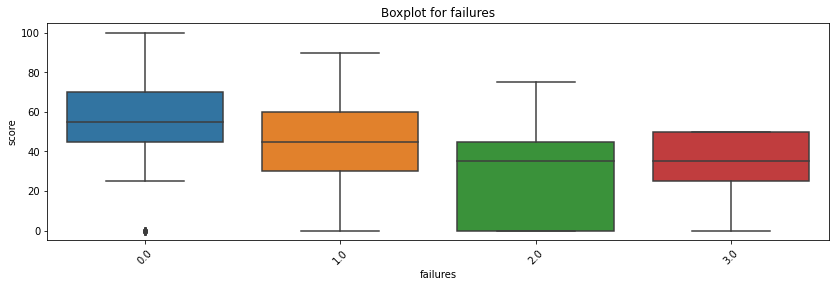

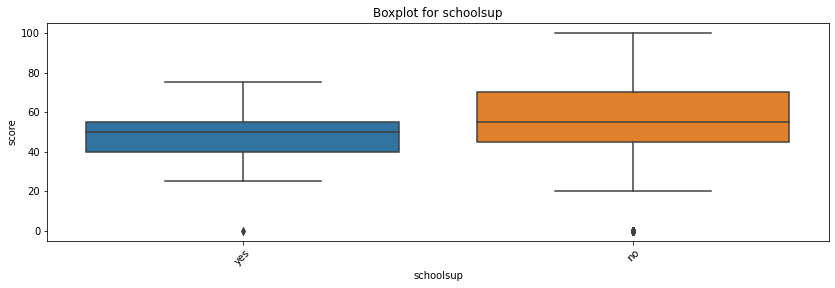

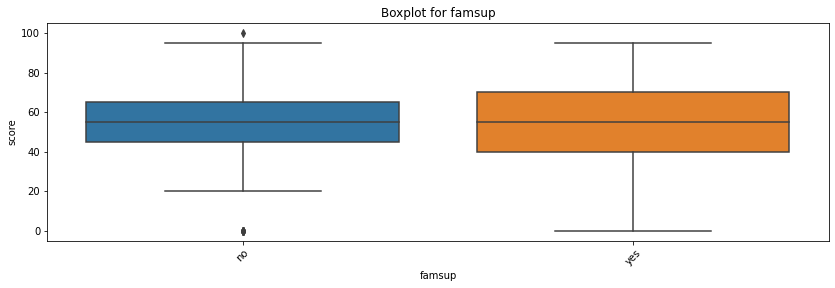

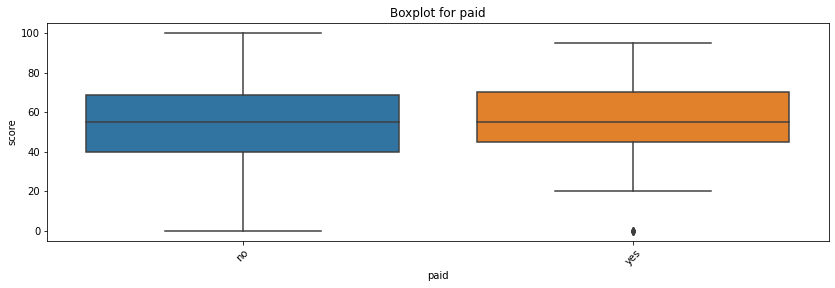

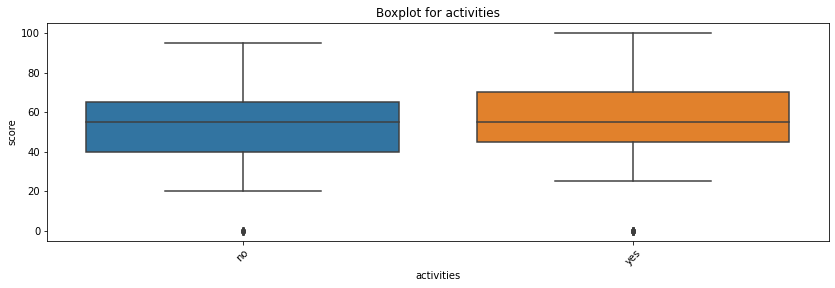

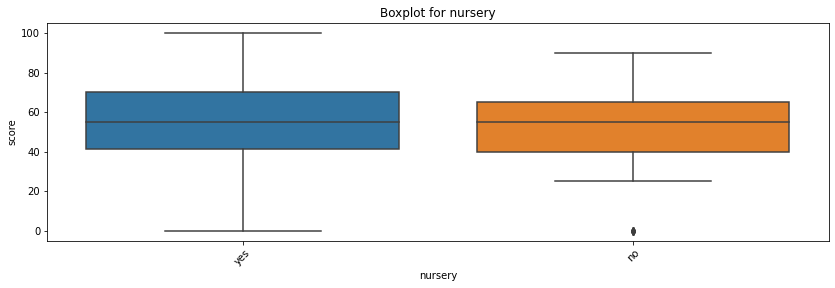

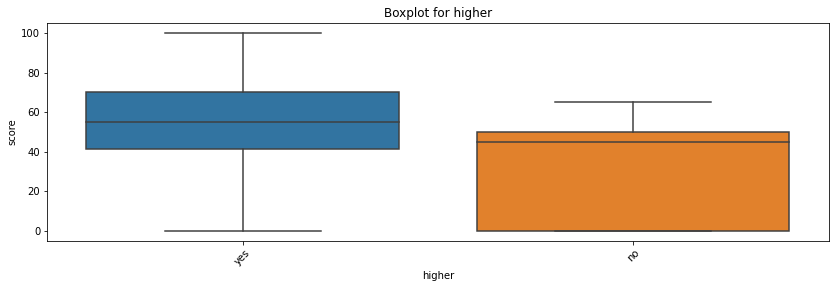

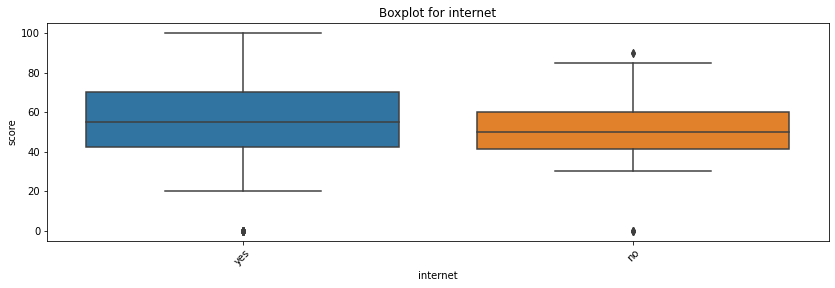

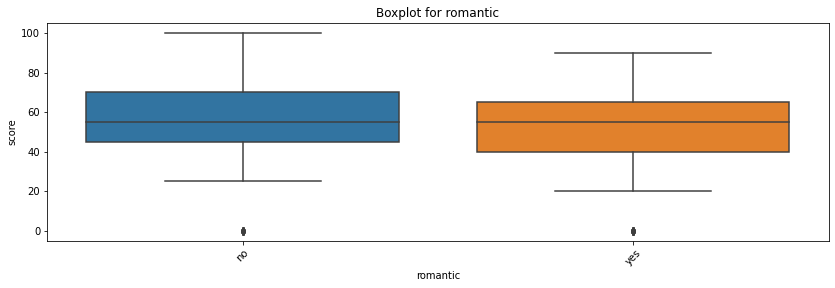

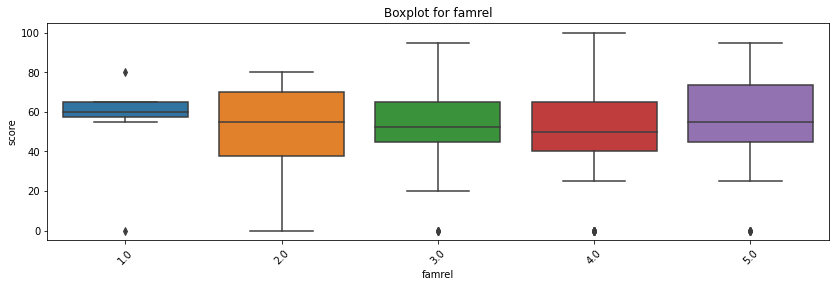

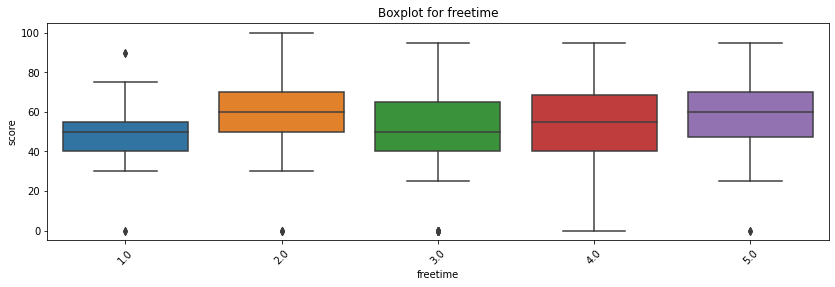

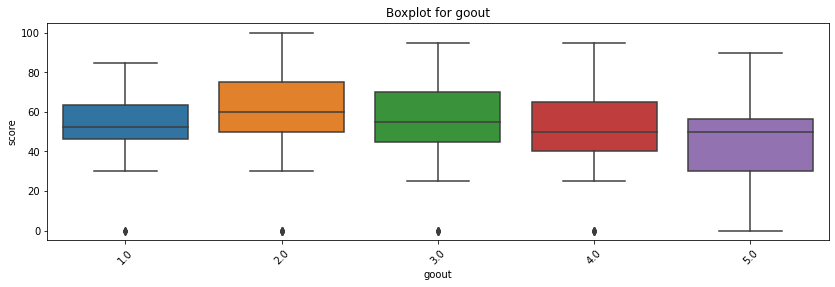

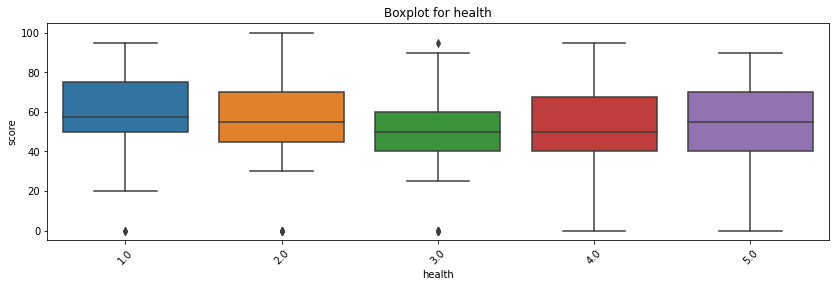

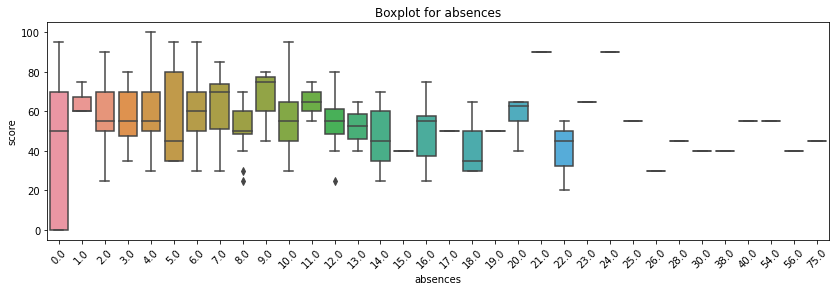

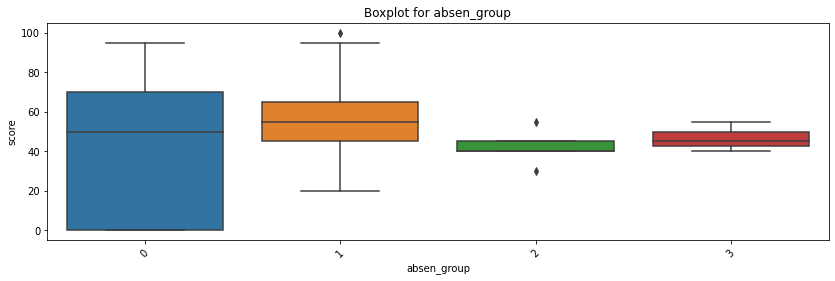

In [15]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'absen_group']:
    get_boxplot(col)

<b>Студенты с нулевой оценкой (возможно не пришли или отказались решать).
Практически в каждом блоке есть во всех столбцах студенты с нулевой оценкой, кроме:
- Возраст от 15 до 19 (это может говорить как о пропускающих подростках и ответственных более взрослых, так и о том, что у нас слишком мало студентов большого возраста, чтобы им еще и пропускать)
- Образование отца и матери: у родителей без образования нет нулевой оценки студента, возможно у них цель сдать экзамен более важна, чем в других семьях?
- У матерей медиков нет нулевых оценок
- Те, кто долго добирается до школы не получили 0.
- При этом только у ребят без пропусков учебы есть нулевые оценки.

Говорит ли это об ответственности каких-то групп или о резком ухудшении здоровья других?
    Но хотелось бы отметить, что у родителей с плохим образованием и у ребят, которым долго добираться до школы - нет нулевой оценки. Возможно это говорит, что данные ученики более ответственно подходят к учебе и экзаменам.

    
Для дальнейшего анализа исключим данных студентов.</b>

In [16]:
students = students.loc[students.score != 0]

In [17]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'absen_group']:
    get_stat_dif(col)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки goout


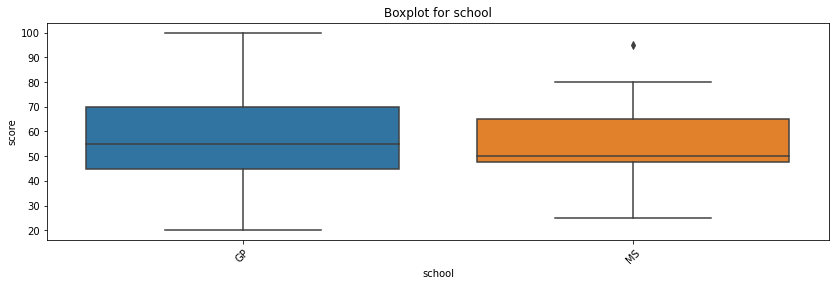

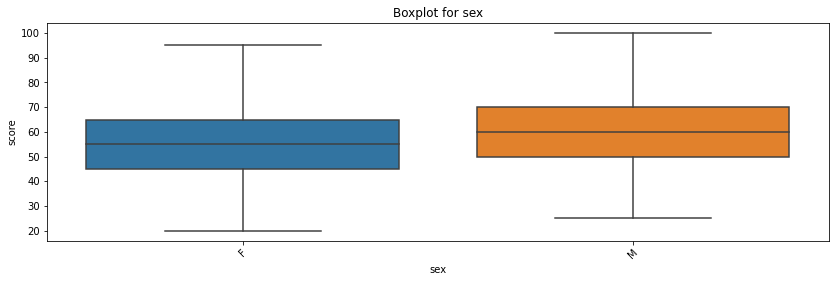

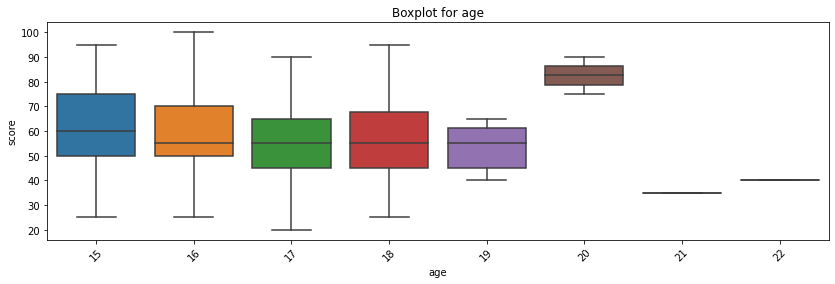

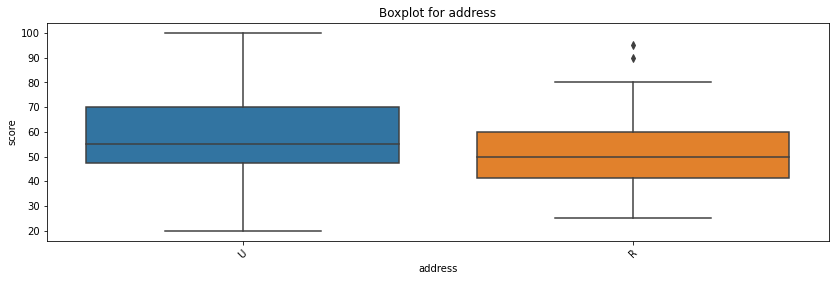

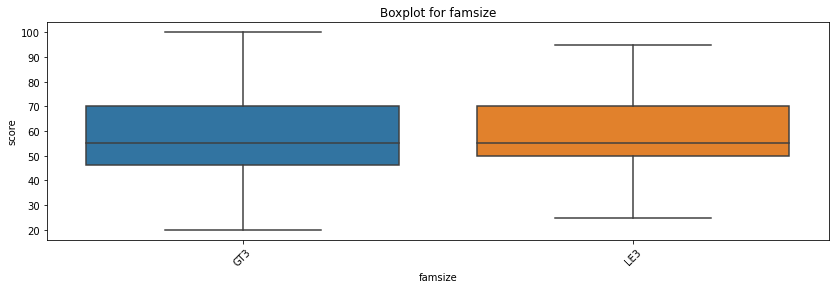

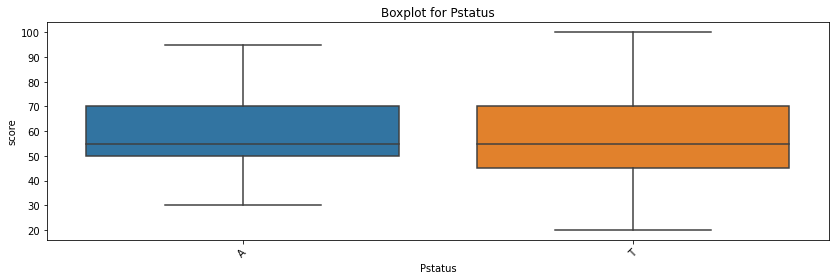

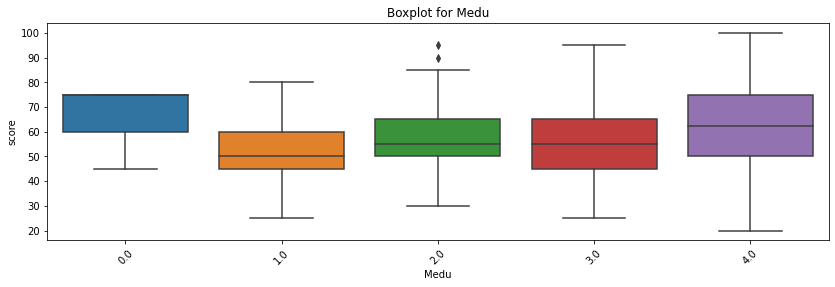

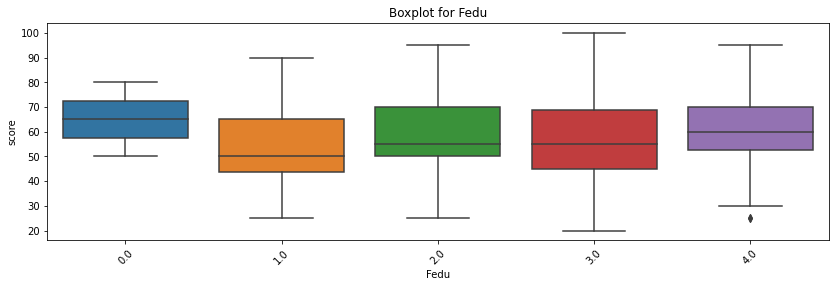

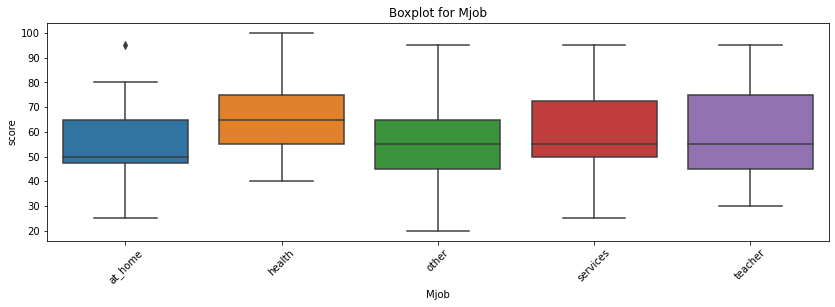

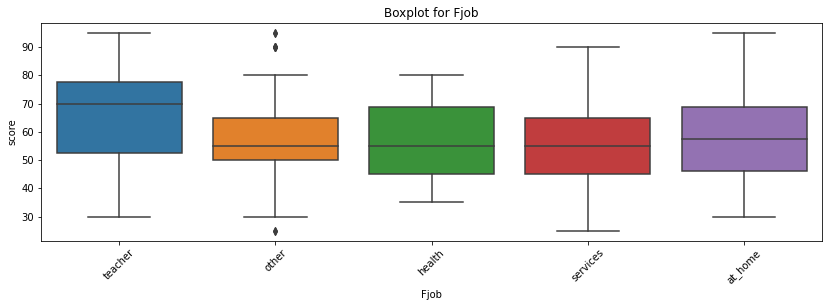

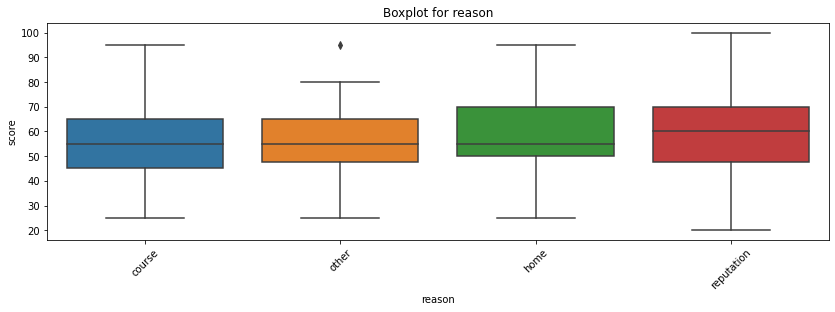

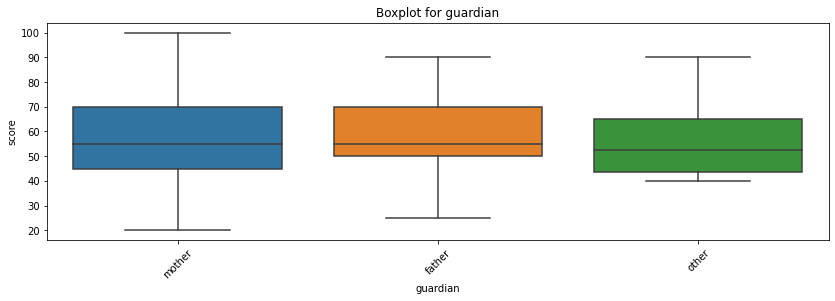

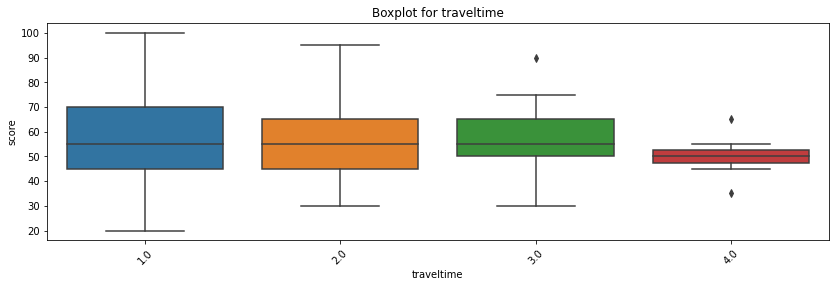

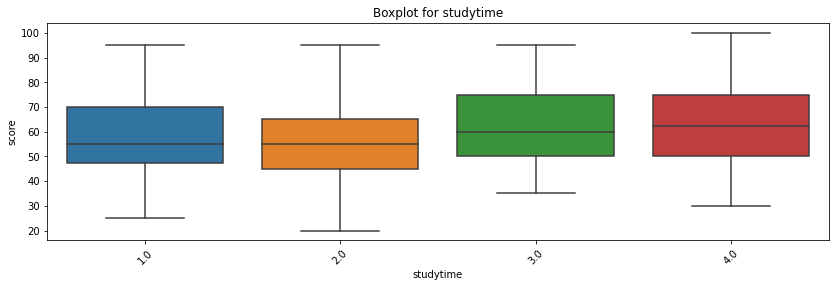

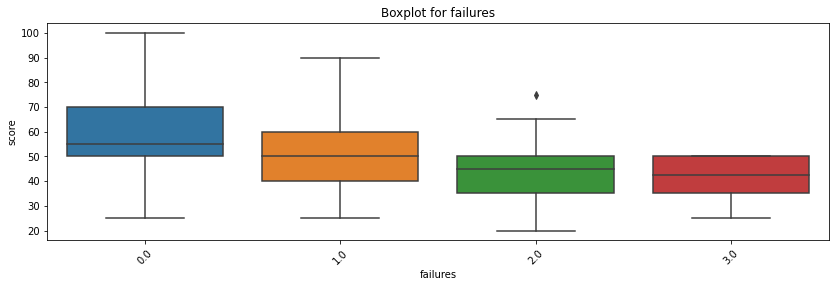

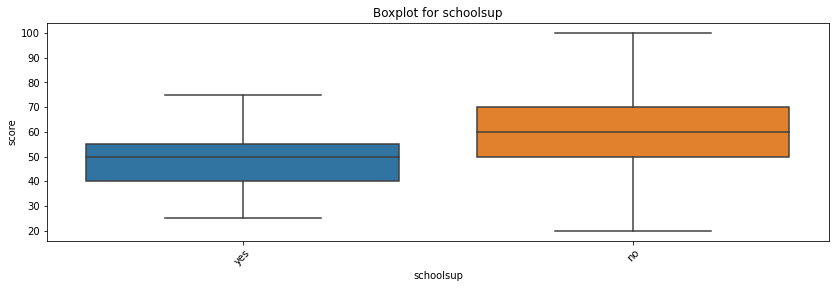

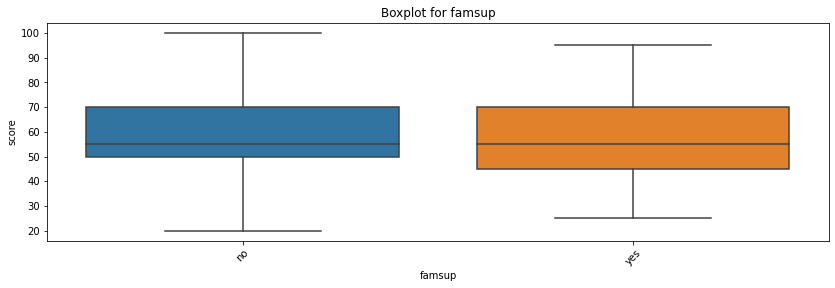

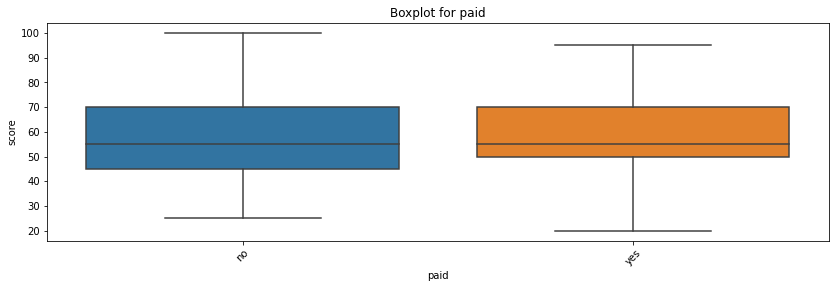

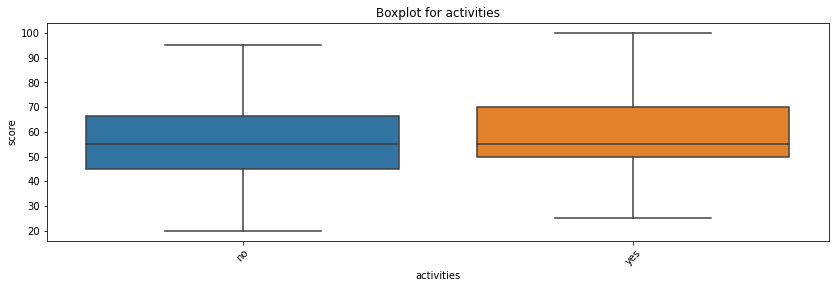

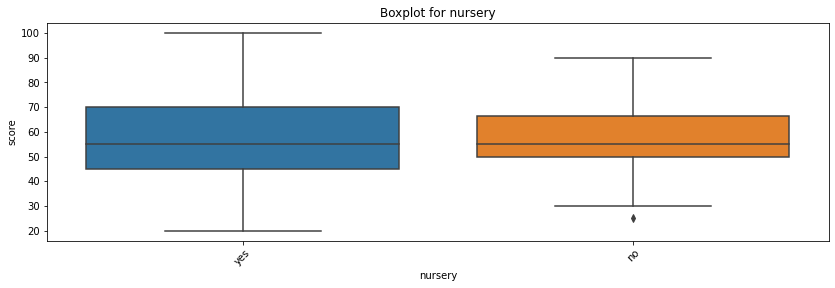

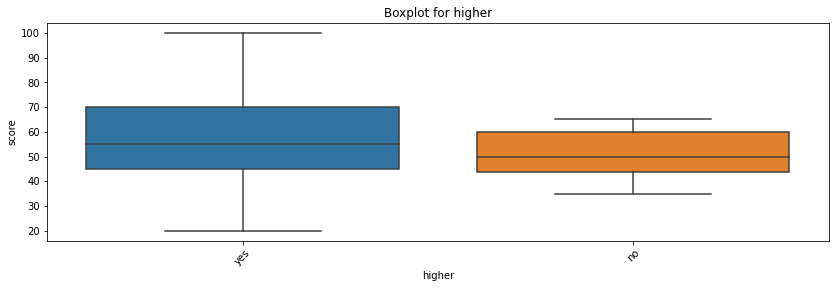

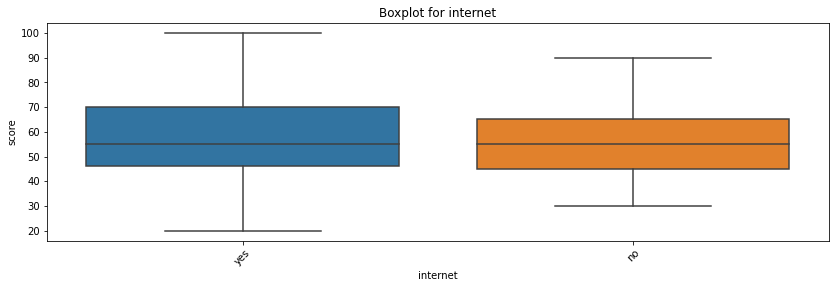

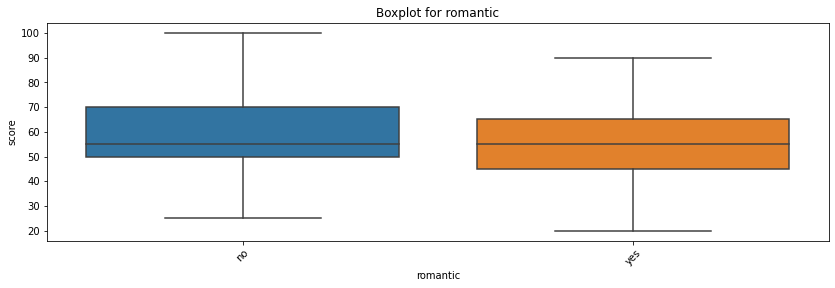

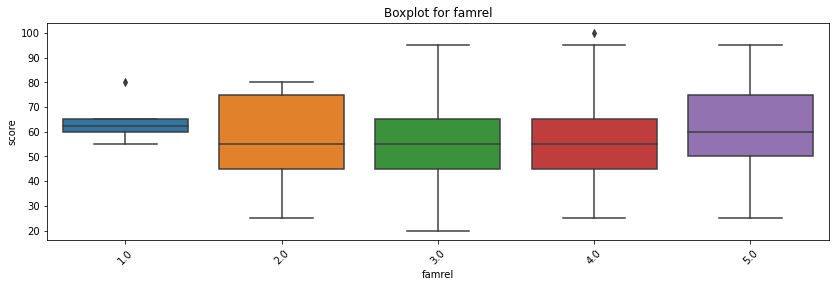

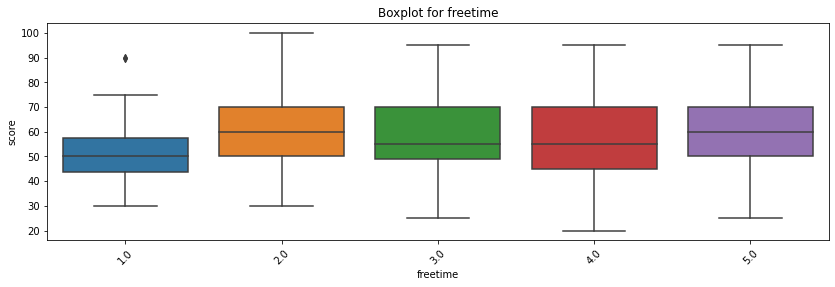

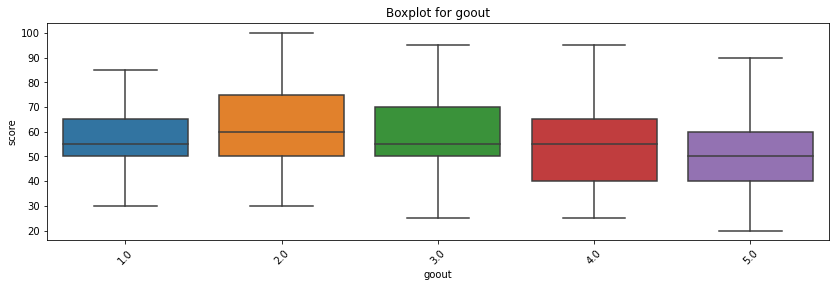

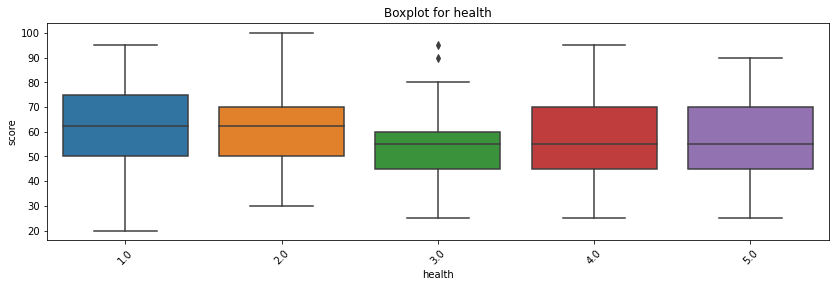

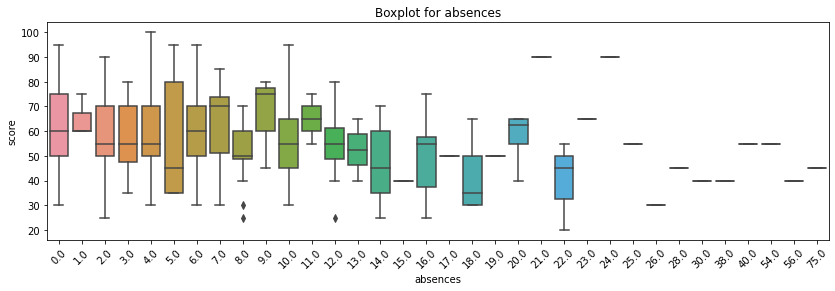

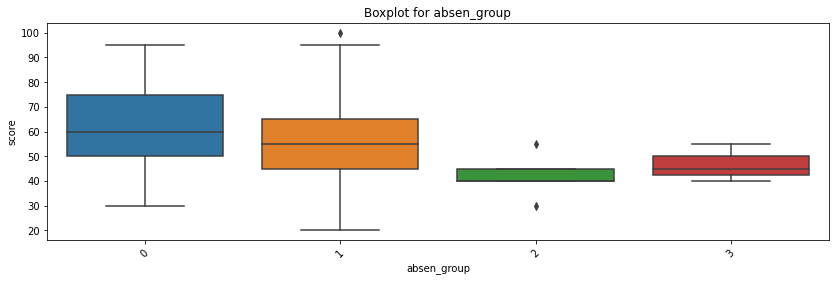

In [18]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'absen_group']:
    get_boxplot(col)

<b>Выводы:
Данные были достаточно чистые и хороше заполненные, некоторые ошибки были удалены. Выбросы были найдены, но они имеют место быть в данной ситуации.
    
Хорошей корреляции нет, средняя или ниже. Только нашлась полная отрицательная - granular vs. studytime.
    
    
Чтобы не было нулевых оценок стоит беспокоиться всем, возможно кроме матерей медиков и взрослых без образования.
    
    
По графикам можем отметить, что не сильно важны данные у: школ, пола, адрес, размера семьи, совместного жилья родителей, причина выбора школы, опекун, дополнительное время на учебу, семейная образовательная поддержка, дополнительные платные занятия по математике, дополнительные внеучебные занятия, детсад, романтические отношения, время с друзьями, здоровье.

Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это age, Medu, Fedu, Mjob, Fjob, traveltime, failures, schoolsup, higher, internet(возможно), famrel, freetime, absences, absen_group.</b>

In [19]:
students_for_model = students.loc[:, ['age', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'traveltime',
                                      'failures', 'schoolsup', 'higher', 'internet', 'famrel',
                                      'freetime', 'absences', 'absen_group']]
students_for_model.head()

,age,Medu,Fedu,Mjob,Fjob,traveltime,failures,schoolsup,higher,internet,famrel,freetime,absences,absen_group
0,18,4.0,4.0,at_home,teacher,2.0,0.0,yes,yes,NaN,4.0,3.0,6.0,1
1,17,1.0,1.0,at_home,other,1.0,0.0,no,yes,yes,5.0,3.0,4.0,1
2,15,1.0,1.0,at_home,other,1.0,3.0,yes,yes,yes,4.0,3.0,10.0,1
3,15,4.0,2.0,health,NaN,1.0,0.0,no,yes,yes,3.0,2.0,2.0,1
4,16,3.0,3.0,other,other,1.0,0.0,no,yes,no,4.0,3.0,4.0,1


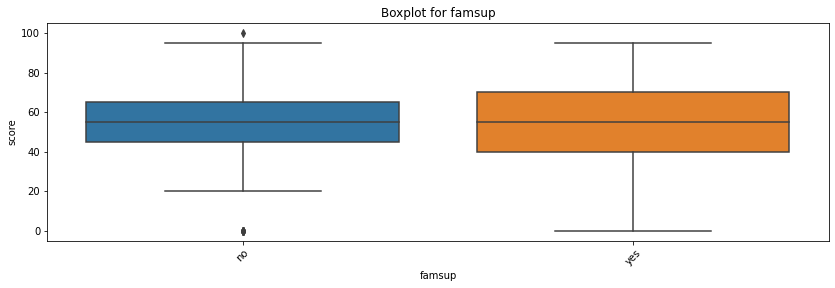

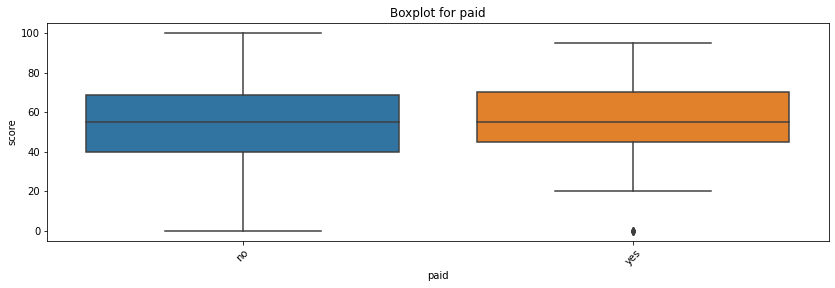

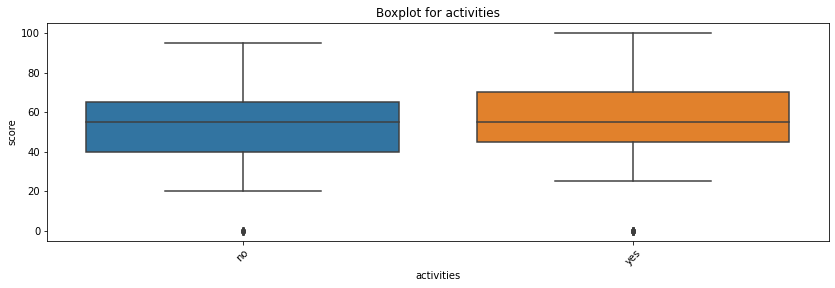

In [65]:
# ДОПОЛНИТЕЛЬНЫЙ ВЫВОД - МЫСЛИ
for col in ['famsup', 'paid', 'activities']:
    get_boxplot(col)

<b>Можно дополнительно обратить внимание на категории: семейная образовательная поддержка, дополнительные платные занятия по математике, дополнительные внеучебные занятия. В целом данные, где да и нет примерно равны. Но возможно нам это говорит о том, что слабые ученики, которым требуюется такого рода поддержка - с ее помощью добиваются таких же результатов как и те ребята, которым такого рода поддержка не нужна.</b>

2    139
1    132
0     71
3     53
Name: sum_group, dtype: int64

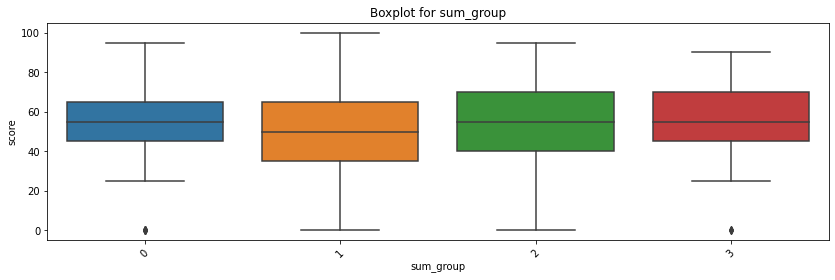

In [84]:
# приведем наши yes/no в данных категориях к числовому эквиваленту 1/0
def change_cat(change):
    if change == 'yes':
        return 1
    else:
        return 0


students['fs_group'] = students.famsup.apply(change_cat)
students['pd_group'] = students.paid.apply(change_cat)
students['ac_group'] = students.activities.apply(change_cat)
students['sum_group'] = students['fs_group'] + \
    students['pd_group'] + students['ac_group']
display(students.sum_group.value_counts())
for col in ['sum_group']:
    get_boxplot(col)

<b>По данному боксплоту видно, что кому-то поддержки оказывается больше суммарно, кому-то меньше, но в любом случае студенты все примерно на одном уровне. Что подтверждает слова из вывода выше.</b>